# Test c of Egreedy

In [19]:
import sys
sys.path.insert(0, 'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank')

In [2]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import oracle,random_player,greedy,bc_mpts

import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

In [4]:
def time_sec_to_HMS(sec):
    heure=sec//3600
    rest_h=sec%3600
    minute=rest_h//60
    rest_m=rest_h%60

    return(str(int(heure))+'H '+str(int(minute))+'min '+str(int(rest_m))+'sec')

In [3]:
def test_c_Egreedy(kappas, thetas,c_list,nb_game=20,nb_trial=5000,n_MAJ = 1):
    nb_prop = len(thetas)  
    nb_place = len(kappas)
    env = Environment_PBM(thetas,kappas)

    #####Oracle + Randome
    player_Oracle = oracle.Oracle(env.get_best_index())
    player_Random = random_player.Random(nb_prop,nb_place)
    referee_Oracle_5000trials_20games = Referee(env,nb_trial)
    referee_Random_5000trials_20games = Referee(env,nb_trial)

    start = time.time()
  
    for i in range(nb_game):
        referee_Oracle_5000trials_20games.play_game(player_Oracle)
        referee_Random_5000trials_20games.play_game(player_Random)

    end = time.time()   
    print ('time_borne :',time_sec_to_HMS(end-start)) 
    ##### initie graph 
    trials = [i for i in range(referee_Oracle_5000trials_20games.nb_trials)]
    plt.figure(figsize=(10, 10))
    plt.plot(trials, np.cumsum(referee_Random_5000trials_20games.get_regret_expected(), axis=0)[trials],'r-', label='Random')

    ######Joues les différents egreedy
    
    start = time.time()
    
    for c in c_list:
        
        referee_EGreedy_5000trials_20games = Referee(env,nb_trial)

    
  
        for i in range(nb_game):
            player_EGreedy =  greedy.greedy_EGreedy(c,nb_prop,nb_place,n_MAJ)
            #print ("nb trial init =",player_EGreedy.nb_trials )
            #print ("thetas_pyclic init =",player_EGreedy.thetas_pyclic )
            referee_EGreedy_5000trials_20games .play_game(player_EGreedy)
            #print ("c =",c )
            #print ("i =",i )
            #print ("nb trial =",player_EGreedy.nb_trials )
            #print ("thetas_pyclic =",player_EGreedy.thetas_pyclic )

    
        ##### Add player perf
        plt.plot(trials, np.cumsum(referee_EGreedy_5000trials_20games.get_regret_expected(), axis=0)[trials], label='Egreedy, c = '+str(c) )
    end = time.time()   
    print ('time TEST egreedy with c : ',time_sec_to_HMS(end-start)) 
    
    #### plot all graph

    plt.xlabel('Time')
    plt.ylabel('Cumulative Expected Regret')
    plt.title ('Test c of Egreedy on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
    plt.legend()
    plt.grid(True)
    plt.loglog()
    plt.show()


# Test thetas

## thetas = [0.1,0.09,...]

In [14]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas1 = [0.1,0.09]+[round(uniform(0, 0.09),2) for i  in range(8)]
nb_prop = len(thetas1)  
nb_place = len(kappas)

In [15]:
thetas1

[0.1, 0.09, 0.05, 0.01, 0.08, 0.04, 0.07, 0.05, 0.07, 0.08]

time_borne : 0H 0min 8sec
time TEST egreedy with c :  0H 5min 20sec


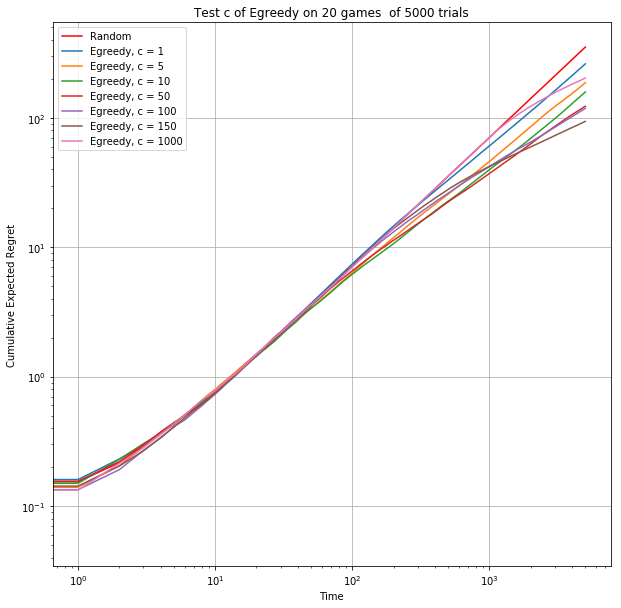

In [16]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas1,c_list,n_MAJ = 1)

time_borne : 0H 0min 42sec
time TEST egreedy with c :  0H 26min 51sec


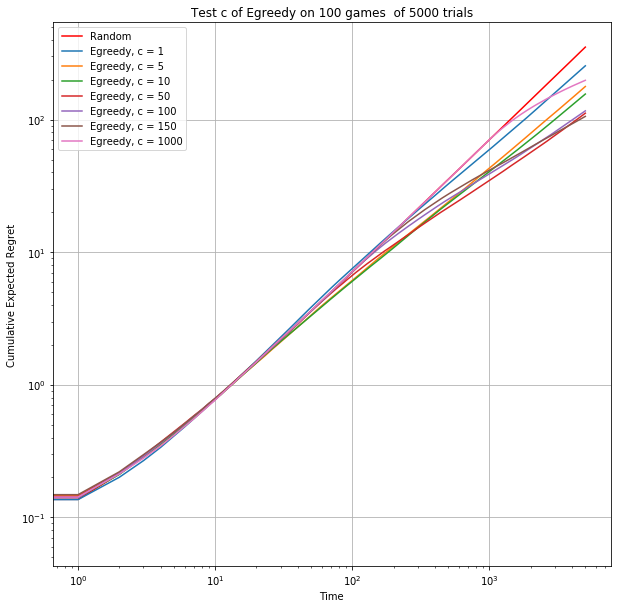

In [17]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas1,c_list,n_MAJ = 1, nb_game=100)

time_borne : 0H 0min 11sec
time TEST egreedy with c :  0H 5min 40sec


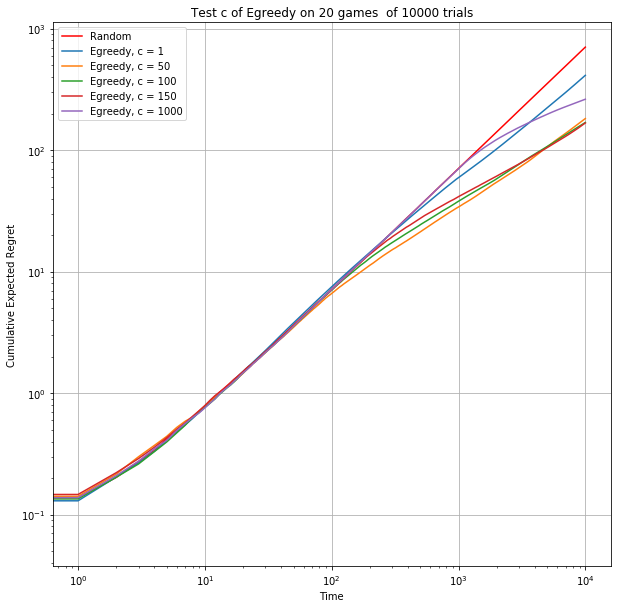

In [18]:
c_list = [1, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas1,c_list,n_MAJ = 1,nb_trial=10000)

## thetas = [0.1,0.05,...]

In [7]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas2 = [0.1,0.05]+[round(uniform(0, 0.05),2) for i  in range(8)]
nb_prop = len(thetas2)  
nb_place = len(kappas)

In [8]:
thetas2

[0.1, 0.05, 0.01, 0.01, 0.03, 0.05, 0.04, 0.0, 0.0, 0.04]

time_borne : 0H 0min 5sec
time TEST egreedy with c :  0H 3min 42sec


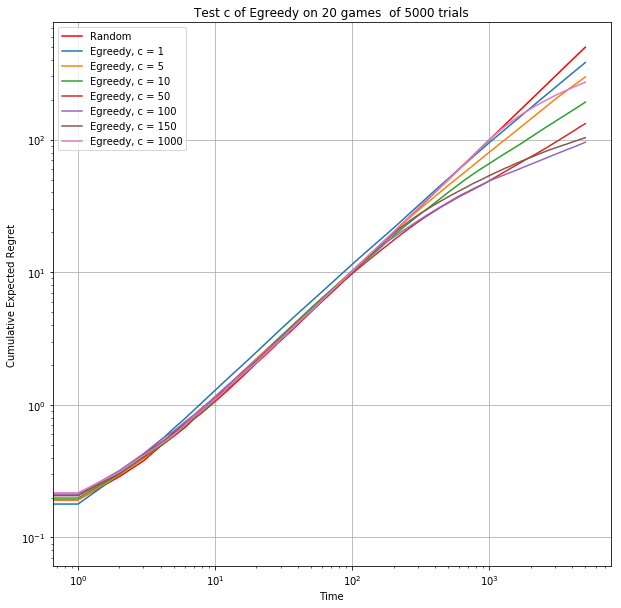

In [13]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas2,c_list,n_MAJ = 1)

time_borne : 0H 0min 16sec
time TEST egreedy with c :  0H 9min 15sec


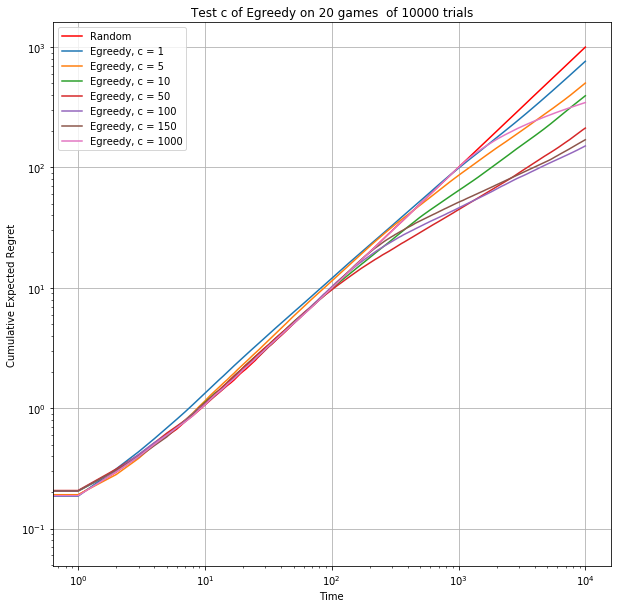

In [18]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas2,c_list,n_MAJ = 1, nb_trial=10000)

## thetas = [0.3,0.1,...]

In [9]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas3 = [0.3,0.1]+[round(uniform(0, 0.1),2) for i  in range(8)]
nb_prop = len(thetas3)  
nb_place = len(kappas)

In [10]:
thetas3

[0.3, 0.1, 0.1, 0.08, 0.09, 0.03, 0.01, 0.01, 0.06, 0.08]

time_borne : 0H 0min 6sec
time TEST egreedy with c :  0H 4min 55sec


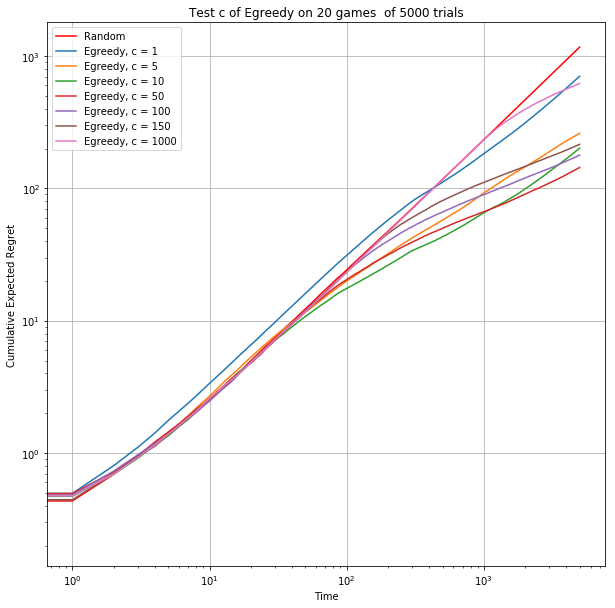

In [11]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas3,c_list,n_MAJ = 1)

time_borne : 0H 0min 34sec
time TEST egreedy with c :  0H 57min 58sec


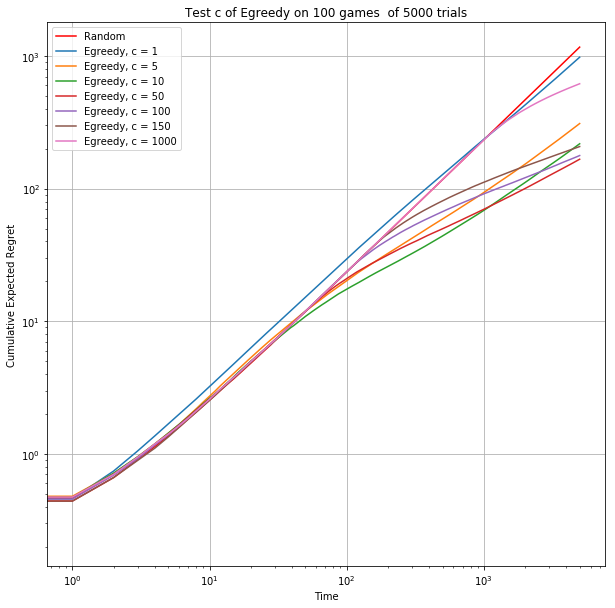

In [12]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas3,c_list,n_MAJ = 1,nb_game=100)

time_borne : 0H 0min 22sec
time TEST egreedy with c :  0H 12min 53sec


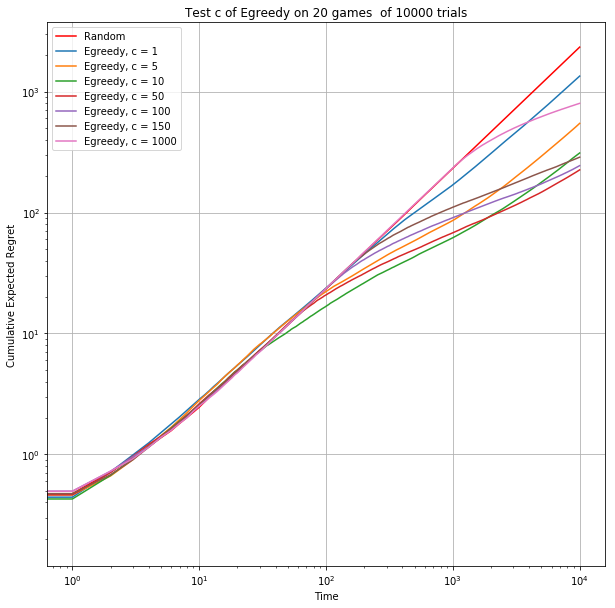

In [13]:
c_list = [1, 5,10, 50,100,150, 1000]
test_c_Egreedy(kappas, thetas3,c_list,n_MAJ = 1, nb_trial=10000)

## thetas_final = [0.3,0.2,0.15,0.15,0.15,0.10,0.05,0.05,0.01,0.01]

In [26]:
kappas = [1,0.3,0.6,0.75,0.1]
thetas_final =  [0.3,0.2,0.15,0.15,0.15,0.10,0.05,0.05,0.01,0.01]
nb_prop = len(thetas_final)  
nb_place = len(kappas)

[0.3, 0.2, 0.15, 0.15, 0.15, 0.1, 0.05, 0.05, 0.01, 0.01]
time_borne : 0H 0min 5sec
time TEST egreedy with c :  0H 3min 37sec


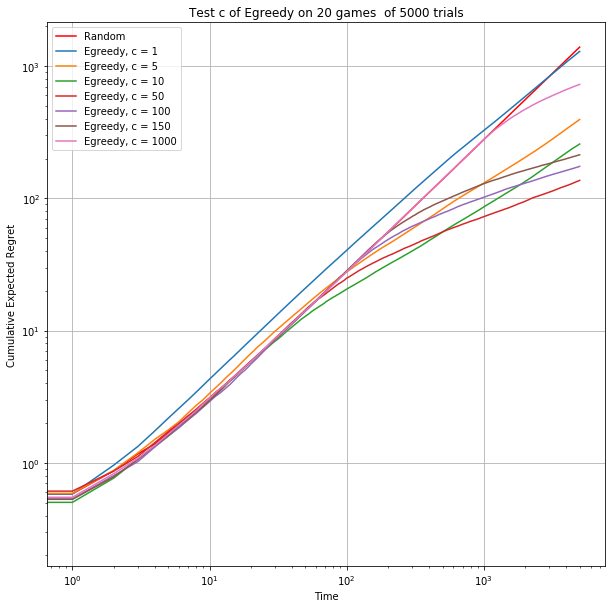

In [27]:
c_list = [1, 5,10, 50,100,150, 1000]
print (thetas_final)
test_c_Egreedy(kappas, thetas_final,c_list,n_MAJ = 1)

[0.3, 0.2, 0.15, 0.15, 0.15, 0.1, 0.05, 0.05, 0.01, 0.01]
time_borne : 0H 0min 26sec
time TEST egreedy with c :  0H 18min 12sec


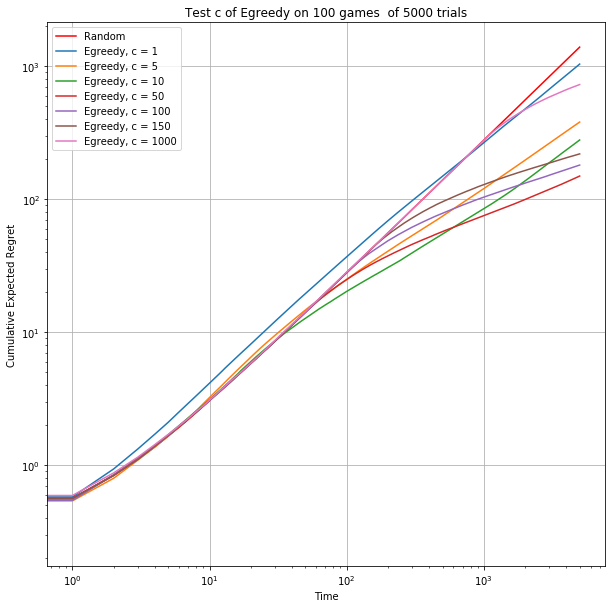

In [28]:
c_list = [1, 5,10, 50,100,150, 1000]
print (thetas_final)
test_c_Egreedy(kappas, thetas_final,c_list,n_MAJ = 1,nb_game=100)

[0.3, 0.2, 0.15, 0.15, 0.15, 0.1, 0.05, 0.05, 0.01, 0.01]
time_borne : 0H 0min 10sec
time TEST egreedy with c :  0H 7min 31sec


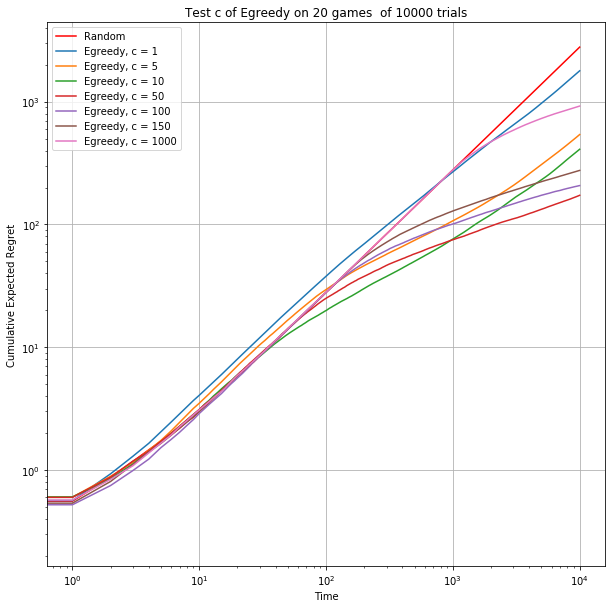

In [29]:
c_list = [1, 5,10, 50,100,150, 1000]
print (thetas_final)
test_c_Egreedy(kappas, thetas_final,c_list,n_MAJ = 1, nb_trial=10000)